<a href="https://colab.research.google.com/github/AdRavi89/TugasKuliahUSM/blob/main/Praktikum_6_AI_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLUSTERING DATA WITH K-MEANS ALGORITHM**

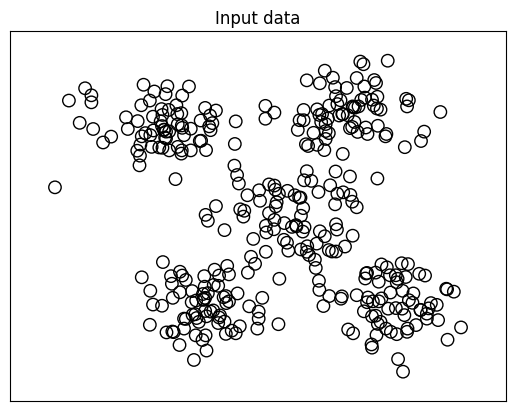

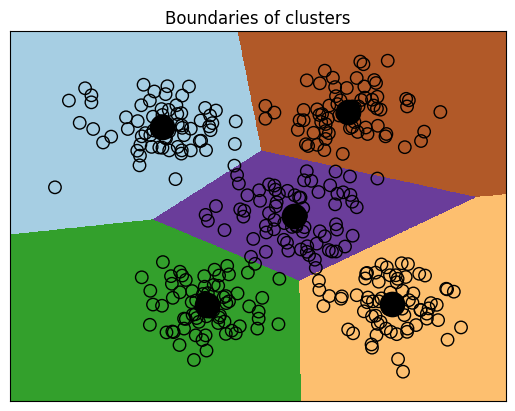

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

X = np.loadtxt('data_clustering.txt', delimiter=',')
num_clusters = 5

plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
        edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

kmeans.fit(X)

step_size = 0.01

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size),
        np.arange(y_min, y_max, step_size))

output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
            extent=(x_vals.min(), x_vals.max(),
          y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')

plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
        edgecolors='black', s=80)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
        marker='o', s=210, linewidths=4, color='black',
        zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


# **ESTIMATING THE NUMBER OF CLUSTERS WITH MEAN SHIFT ALGORITHM**


Centers of clusters:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]

Number of clusters in input data = 5


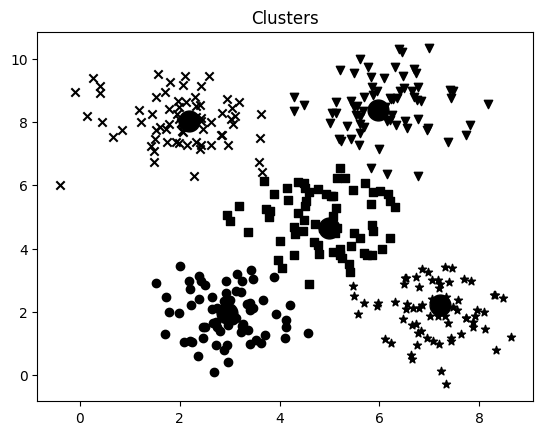

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

X = np.loadtxt('data_clustering.txt', delimiter=',')

bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)

plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='black')

    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',
            markerfacecolor='black', markeredgecolor='black',
            markersize=15)

plt.title('Clusters')
plt.show()


# **ESTIMATING THE QUALITY OF CLUSTERING WITH SIHOUETTE SCORES**


Number of clusters = 2
Silhouette score = 0.47762624870454473

Number of clusters = 3
Silhouette score = 0.5471742411734871

Number of clusters = 4
Silhouette score = 0.5770200623338163

Number of clusters = 5
Silhouette score = 0.5890032635647954

Number of clusters = 6
Silhouette score = 0.6096904118954452

Number of clusters = 7
Silhouette score = 0.5531506134707689

Number of clusters = 8
Silhouette score = 0.4968255940975245

Number of clusters = 9
Silhouette score = 0.4540415614587603

Optimal number of clusters = 6


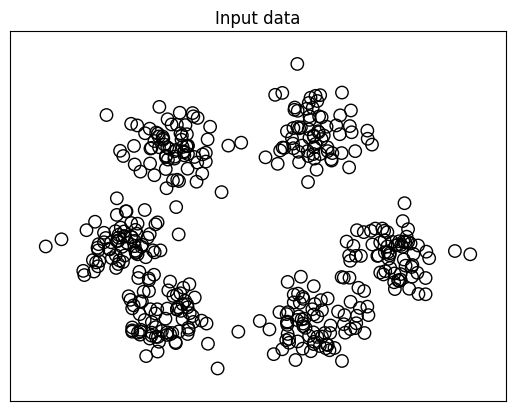

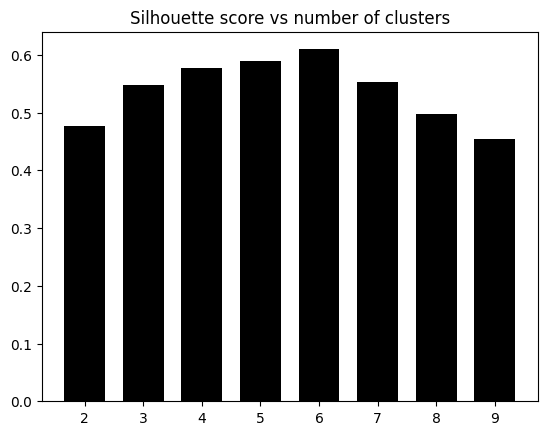

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

X = np.loadtxt('data_quality.txt', delimiter=',')

plt.figure()
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

scores = []
values = np.arange(2, 10)

for num_clusters in values:
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_,
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)

    scores.append(score)

plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()
